# Data set of House Prediction

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
# Here we found Outlier, that above 324.0 price rate is a outlier bcz we put a percentile 95% 
# Means 95 % tak data 324 se kam h....

max_threshold = df['price'].quantile(0.95)
max_threshold

324.0

In [6]:
# Means 5 % tak data 72 se kam h....

min_threshold = df['price'].quantile(0.5)
min_threshold

72.0

In [7]:
df[df['price']>max_threshold]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.0
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.0
22,Plot Area,Ready To Move,Thanisandra,4 Bedroom,Soitya,2800,5.0,2.0,380.0
62,Plot Area,Ready To Move,Whitefield,4 Bedroom,Chranya,5700,5.0,3.0,650.0
122,Super built-up Area,18-Mar,Hebbal,4 BHK,SNontle,3067 - 8156,4.0,0.0,477.0
...,...,...,...,...,...,...,...,...,...
13261,Plot Area,Ready To Move,Havanur extension,3 Bedroom,NaN,2000,2.0,2.0,360.0
13290,Super built-up Area,Ready To Move,Sarjapur Road,4 BHK,Maana E,4050,2.0,1.0,450.0
13306,Plot Area,Ready To Move,Rajarajeshwari Nagara,4 Bedroom,NaN,1200,5.0,NaN,325.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0


In [8]:
df[df['price']<min_threshold]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
...,...,...,...,...,...,...,...,...,...
13310,Super built-up Area,Ready To Move,Rachenahalli,2 BHK,NaN,1050,2.0,2.0,52.71
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [9]:
# Here we remove Outliers where we store dat into df2. 

df2 = df[(df['price']<max_threshold) & (df['price']>min_threshold)]
df2.sample(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
8587,Super built-up Area,20-Dec,Whitefield,3 BHK,Oreldhi,1564,3.0,1.0,103.0
12485,Built-up Area,Ready To Move,Thubarahalli,4 BHK,VincyRe,3408,5.0,NaN,145.0
11606,Plot Area,Ready To Move,BTM 4th Stage,2 Bedroom,NaN,1350,2.0,0.0,90.0
3878,Super built-up Area,Ready To Move,Hebbal,3 BHK,NaN,2080,3.0,3.0,175.0
6072,Built-up Area,Ready To Move,R.T. Nagar,3 BHK,SiineSu,1560,3.0,3.0,125.0
719,Super built-up Area,20-Jun,Dairy Circle,3 BHK,Soeurri,1855,3.0,1.0,225.0
10782,Super built-up Area,Ready To Move,Hosur Road,3 BHK,Saageat,2289,3.0,3.0,180.0
5294,Super built-up Area,Ready To Move,Byatarayanapura,4 BHK,Reeroce,2631,3.0,NaN,200.0
9457,Built-up Area,Ready To Move,TC Palaya,2 BHK,GilomSh,1800,2.0,2.0,80.0
1138,Super built-up Area,Ready To Move,Kasturi Nagar,3 BHK,NaN,1570,3.0,3.0,80.0


# Data set of NYC

In [16]:
df3 = pd.read_csv('AB_NYC_2019.csv')
df3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
min_threshold = df3['price'].quantile(0.5)
min_threshold

106.0

In [18]:
max_threshold = df3['price'].quantile(0.95)
max_threshold

355.0

In [19]:
df_3 = df3[(df3['price']<max_threshold) & (df3['price']>min_threshold)]
df_3.sample(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
44258,34138100,"Lux FiDi 1BR w/ Resident's Bar, Golf Simulator...",107434423,Blueground,Manhattan,Financial District,40.70586,-74.00904,Entire home/apt,262,30,0,NaN,NaN,232,325
37945,30007128,Newly renovated apartment in Brooklyn Townhouse,157410883,Chiara,Brooklyn,Bushwick,40.69372,-73.92283,Entire home/apt,120,1,39,2019-06-22,5.27,1,196
37957,30011365,1 bed close to Park and subway,113805886,Yaacov,Manhattan,Upper East Side,40.77751,-73.95174,Entire home/apt,150,31,1,2019-05-25,0.67,33,338
41261,32112767,Couples Retreat,137463409,Marsha,Queens,Maspeth,40.72595,-73.90299,Entire home/apt,150,1,24,2019-07-01,5.26,1,236
5286,3819703,5107-Studio Doorman GYM LuX,16098958,Jeremy & Laura,Manhattan,Upper West Side,40.79082,-73.97452,Entire home/apt,140,30,4,2017-09-04,0.09,96,342
35541,28214075,HK AUTHENTIC TENEMENT UPDATED,213065914,Joshua,Manhattan,Hell's Kitchen,40.76557,-73.99174,Private room,120,1,56,2019-06-30,5.81,1,4
24614,19787245,CHIC & BRIGHT APT ON UES CLOSE TO CENTRAL PARK,9293730,Inna,Manhattan,Upper East Side,40.76937,-73.95745,Entire home/apt,155,30,8,2019-04-24,0.37,16,333
11626,9046203,Large renovated 2 bedroom apt.,47202400,Alister,Brooklyn,Bedford-Stuyvesant,40.67867,-73.92282,Entire home/apt,130,3,129,2019-06-11,2.93,1,163
32346,25314051,Large Boerum Hill 2 Bedroom,20520488,Laura,Brooklyn,Gowanus,40.68075,-73.98181,Entire home/apt,240,3,4,2018-10-21,0.31,1,0
29938,23047572,Big apartment can make your vacation to be ama...,87399457,Elior,Brooklyn,Crown Heights,40.66896,-73.95347,Entire home/apt,220,4,4,2019-05-08,0.24,1,0


In [10]:
df2.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
7468,Plot Area,Ready To Move,Rajaji Nagar,5 Bedroom,NaN,900,4.0,0.0,140.0
2566,Built-up Area,Ready To Move,Friends Colony,3 BHK,NaN,1150,2.0,1.0,75.0
11190,Plot Area,Ready To Move,LB Shastri Nagar,8 Bedroom,NaN,2400,8.0,1.0,250.0
10525,Super built-up Area,Ready To Move,7th Phase JP Nagar,3 BHK,NaN,2095,3.0,2.0,150.0
11389,Super built-up Area,18-May,Electronic City Phase II,4 BHK,SNbay G,2150 - 2225,4.0,0.0,105.0


In [11]:
# For remove outlier with thehelp of standard deviation (4)

upper_limit = df2.price.mean() + 4 * df2.price.std()
upper_limit

367.7781200496961

In [12]:
lower_limit = df2.price.mean() - 4 * df2.price.std()
lower_limit

-102.45507833376948

In [13]:
df2.price.std()

58.779149797933194

In [27]:
df2[(df2['price']< upper_limit) & (df2['price']> lower_limit)]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,z_score,zscore
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,-0.215408,-0.215408
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,-0.640729,-0.640729
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00,1.213670,1.213670
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00,2.761838,2.761838
14,Plot Area,Ready To Move,Sarjapur,3 Bedroom,Skityer,2250,3.0,2.0,148.00,0.260951,0.260951
...,...,...,...,...,...,...,...,...,...,...,...
13308,Built-up Area,Ready To Move,Bannerghatta Road,3 BHK,Baanise,1527,3.0,1.0,142.00,0.158874,0.158874
13309,Super built-up Area,Ready To Move,Yeshwanthpur,3 BHK,IBityin,1675,3.0,NaN,92.13,-0.689556,-0.689556
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.00,1.996260,1.996260
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00,-0.351511,-0.351511


In [28]:
df2['z_score'] = (df2.price - df2.price.mean())/ df2.price.std()
df2.head(5)

<ipython-input-28-3061a2a3abd6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['z_score'] = (df2.price - df2.price.mean())/ df2.price.std()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,z_score,zscore
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.0,-0.215408,-0.215408
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.0,-0.640729,-0.640729
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.0,1.213670,1.213670
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.0,2.761838,2.761838
14,Plot Area,Ready To Move,Sarjapur,3 Bedroom,Skityer,2250,3.0,2.0,148.0,0.260951,0.260951


In [25]:
df2.shape

(5921, 11)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

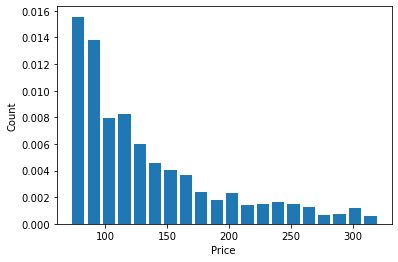

In [30]:
from scipy.stats import norm
plt.hist(df2.price, bins=20, rwidth=0.8,density=True)
plt.xlabel('Price ')
plt.ylabel('Count')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

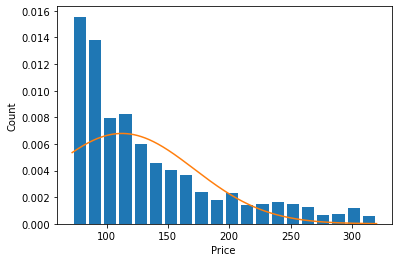

In [32]:
from scipy.stats import norm
plt.hist(df2.price, bins=20, rwidth=0.8,density=True)
plt.xlabel('Price ')
plt.ylabel('Count')
rng = np.arange(df2.price.min(), df2.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.price.mean(),df2.price.std()))

In [5]:
df_hw = pd.read_csv('weight-height.csv')
df_hw.sample(15)

,Gender,Height,Weight
4854,Male,65.388628,165.546213
8355,Female,62.283671,132.576418
5486,Female,64.241109,142.579014
9019,Female,64.821574,155.008924
3794,Male,68.950570,177.023189
6582,Female,62.336623,134.112154
209,Male,67.580747,186.991607
7001,Female,61.926250,113.648007
8923,Female,58.761917,102.455361
3777,Male,73.249357,217.426659


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

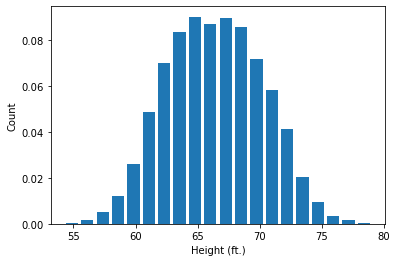

In [7]:
# Histogram for height

from scipy.stats import norm
plt.hist(df_hw.Height, bins=20, rwidth=0.8,density=True)
plt.xlabel('Height (ft.)')
plt.ylabel('Count')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count')

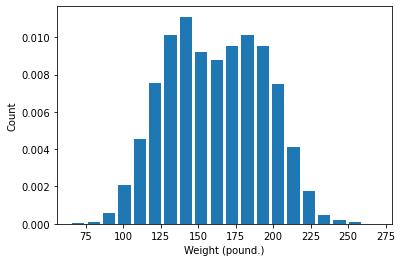

In [9]:
# Histogram for Weight

from scipy.stats import norm
plt.hist(df_hw.Weight, bins=20, rwidth=0.8,density=True)
plt.xlabel('Weight (pound.)')
plt.ylabel('Count')

In [10]:
df_hw.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [11]:
# Quantile values for Weight

Q1_w = df_hw.Weight.quantile(0.25)
Q3_w = df_hw.Weight.quantile(0.75)
Q1_w,Q3_w

(135.8180513055015, 187.16952486868348)

In [12]:
# Quantile values for Height

Q1_h = df_hw.Height.quantile(0.25)
Q3_h = df_hw.Height.quantile(0.75)
Q1_h,Q3_h

(63.505620481218955, 69.1742617268347)

In [13]:
# Find IQR Value for Weight

IQR_w = Q3_w - Q1_w 
lower_limit_weight = Q1_w - 1.5 * IQR_w
upper_limit_weight = Q3_w + 1.5 * IQR_w
lower_limit_weight,upper_limit_weight

(58.79084096072856, 264.19673521345646)

In [16]:
# Outlier for Weight

df_hw[(df_hw.Weight < lower_limit_weight) | (df_hw.Weight > upper_limit_weight)]

,Gender,Height,Weight
2014,Male,78.998742,269.989699


In [17]:
# Find IQR Value for Height

IQR_h = Q3_h - Q1_h
lower_limit_height = Q1_w - 1.5 * IQR_h
upper_limit_height = Q3_w + 1.5 * IQR_h
lower_limit_height,upper_limit_height

(127.31508943707789, 195.6724867371071)

In [18]:
# Outlier for Height

df_hw[(df_hw.Height < lower_limit_height) | (df_hw.Height > upper_limit_height)]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


# Marcedes Benz Data Set

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('mercedesbenz.csv')

In [3]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(4209, 378)

In [5]:
# We apply Count/Frequency Encoding Tecniques

len(df['X1'].unique())

27

In [6]:
len(df['X2'].unique())

44

In [7]:
df.X2.head()

0    at
1    av
2     n
3     n
4     n
Name: X2, dtype: object

In [8]:
# collect value's Count in a form of Dictionary

df.X1.value_counts().to_dict()

{'aa': 833,
 's': 598,
 'b': 592,
 'l': 590,
 'v': 408,
 'r': 251,
 'i': 203,
 'a': 143,
 'c': 121,
 'o': 82,
 'w': 52,
 'z': 46,
 'u': 37,
 'e': 33,
 'm': 32,
 't': 31,
 'h': 29,
 'y': 23,
 'f': 23,
 'j': 22,
 'n': 19,
 'k': 17,
 'p': 9,
 'g': 6,
 'q': 3,
 'd': 3,
 'ab': 3}

In [9]:
df.X2.value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'i': 25,
 'k': 25,
 'b': 21,
 'ao': 20,
 'z': 19,
 'ag': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'ap': 11,
 'y': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'an': 5,
 'al': 5,
 'q': 5,
 'av': 4,
 'p': 4,
 'ah': 4,
 'au': 3,
 'c': 1,
 'j': 1,
 'o': 1,
 'aa': 1,
 'af': 1,
 'l': 1,
 'am': 1,
 'ar': 1}

In [10]:
df_freq_map_X1 = df.X1.value_counts().to_dict()

In [11]:
df_freq_map_X2 = df.X2.value_counts().to_dict()

In [12]:
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df.X1 = df.X1.map(df_freq_map_X1)
df.X2 = df.X2.map(df_freq_map_X1)

In [15]:
df.head(10)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,408,NaN,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,31,NaN,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,52,19.0,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,31,19.0,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,408,19.0,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0
5,18,92.93,t,592,33.0,c,d,g,h,s,...,0,0,1,0,0,0,0,0,0,0
6,24,128.76,al,251,33.0,f,d,f,h,s,...,0,0,0,0,0,0,0,0,0,0
7,25,91.91,o,590,NaN,f,d,f,j,a,...,0,0,0,0,0,0,0,0,0,0
8,27,108.67,w,598,NaN,e,d,f,i,h,...,1,0,0,0,0,0,0,0,0,0
9,30,126.99,j,592,NaN,c,d,f,a,e,...,0,0,1,0,0,0,0,0,0,0


# Titanic Data Set

### 1. Mean/Median/Mode Imputer 

In [23]:
df_titanic = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])
df_titanic.sample(10)

,Survived,Age,Fare
539,1,22.0,49.5000
521,0,22.0,7.8958
298,1,NaN,30.5000
740,1,NaN,30.0000
495,0,NaN,14.4583
193,1,3.0,26.0000
349,0,42.0,8.6625
430,1,28.0,26.5500
367,1,NaN,7.2292
319,1,40.0,134.5000


### NaN Value

In [18]:
df_titanic.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [24]:
## We have to remove all NaN value from the Age Columns with median

def imput_nan(df_titanic,variable,median):
    df_titanic[variable + '_median'] = df_titanic[variable].fillna(median)

median = df_titanic.Age.median()
imput_nan(df_titanic,'Age',median)
df_titanic.sample(10)

,Survived,Age,Fare,Age_median
669,1,NaN,52.0000,28.0
11,1,58.0,26.5500,58.0
354,0,NaN,7.2250,28.0
12,0,20.0,8.0500,20.0
699,0,42.0,7.6500,42.0
89,0,24.0,8.0500,24.0
299,1,50.0,247.5208,50.0
409,0,NaN,25.4667,28.0
151,1,22.0,66.6000,22.0
634,0,9.0,27.9000,9.0


In [25]:
# Standard Deviation

print(df_titanic['Age'].std())
print(df_titanic['Age_median'].std())

# Both values are approx same.......

14.526497332334044
13.019696550973194


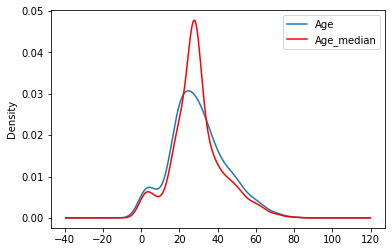

In [27]:
# Visualization

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df_titanic['Age'].plot(kind = 'kde', ax=ax)
df_titanic.Age_median.plot(kind = 'kde', ax=ax, color = 'red')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### 2. Random Sample Imputer

In [13]:
import pandas as pd
df_titanic = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])

In [14]:
df_titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df_titanic['Age'].isnull().sum()

177

In [16]:
# We have to replace all NaN value to random Values

df_titanic['Age'].dropna().sample(df_titanic['Age'].isnull().sum(),random_state = 42)

149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: Age, Length: 177, dtype: float64

In [18]:
def imput_nan(df_titanic,variable,median):
    df_titanic[variable + '_median'] = df_titanic[variable].fillna(median)
    df_titanic[variable + '_random'] = df_titanic[variable]

    # It will fill the NaN value by Random Sample
    random_sample = df_titanic['Age'].dropna().sample(df_titanic['Age'].isnull().sum(),random_state = 42)


    # Pandas need to have some index inorder to merge the dataset
    random_sample.index = df_titanic[df_titanic[variable].isnull()].index



149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: Age, Length: 177, dtype: float64

In [19]:
median = df_titanic.Age.median()
median

28.0

In [20]:
imput_nan(df_titanic,'Age',median)
df_titanic.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


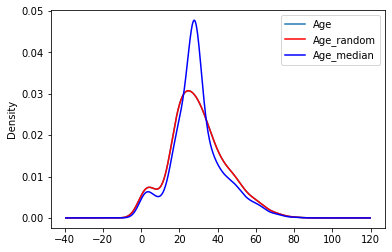

In [22]:
 # Visualization

import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
df_titanic['Age'].plot(kind = 'kde', ax=ax)
df_titanic.Age_random.plot(kind = 'kde', ax=ax, color = 'red')
df_titanic.Age_median.plot(kind = 'kde', ax=ax, color = 'blue')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### 3. Capturing NaN Value with new Feature

In [29]:
import pandas as pd
import numpy as np
df_titanic1 = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])

In [30]:
df_titanic1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
df.Age.isnull().sum()

177

In [34]:
df_titanic1['Age_NaN'] = np.where(df_titanic1['Age'].isnull(),1,0)
df_titanic1.sample(15)

,Survived,Age,Fare,Age_NaN
755,1,0.67,14.5000,0
106,1,21.00,7.6500,0
244,0,30.00,7.2250,0
620,0,27.00,14.4542,0
848,0,28.00,33.0000,0
835,1,39.00,83.1583,0
118,0,24.00,247.5208,0
568,0,NaN,7.2292,1
443,1,28.00,13.0000,0
426,1,28.00,26.0000,0


In [36]:
df_titanic1['Age'].fillna(df_titanic1.Age.median(),inplace = True)
df_titanic1.sample(10)

,Survived,Age,Fare,Age_NaN
158,0,28.0,8.6625,1
274,1,28.0,7.7500,1
57,0,28.5,7.2292,0
557,0,28.0,227.5250,1
507,1,28.0,26.5500,1
626,0,57.0,12.3500,0
372,0,19.0,8.0500,0
290,1,26.0,78.8500,0
872,0,33.0,5.0000,0
790,0,28.0,7.7500,1


### 4. End of Distribution Imputation

In [2]:
import pandas as pd
import numpy as np
df_titanic1 = pd.read_csv('titanic.csv',usecols = ['Age','Fare','Survived'])
df_titanic1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

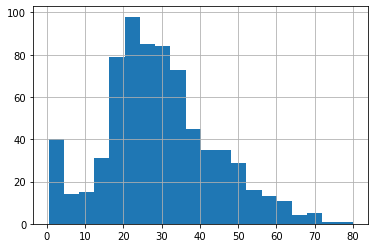

In [4]:
df_titanic1.Age.hist(bins = 20)

In [5]:
df_titanic1.Age.mean()

29.69911764705882

In [6]:
# Far Distribution / Right end of the distribution

extreme = df_titanic1.Age.mean() + 3*df_titanic1.Age.std()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

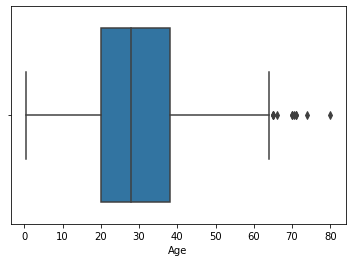

In [7]:
import seaborn as sns
sns.boxplot('Age',data = df_titanic1)

# Here we found Outliers

In [10]:
def imput_nan(df_titanic1,variable,median,extreme):
    df_titanic1[variable + '_end_distribution'] = df_titanic1[variable].fillna(extreme)
    df_titanic1[variable].fillna(median,inplace = True)

In [11]:
median = df_titanic1.Age.median()
imput_nan(df_titanic1,'Age',median,extreme)

<AxesSubplot:>

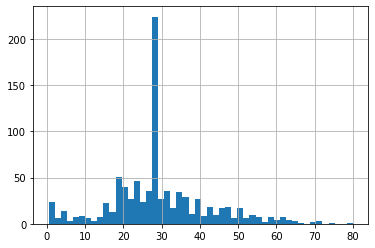

In [14]:
df_titanic1['Age'].hist(bins = 50)

<AxesSubplot:>

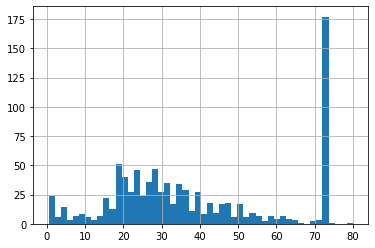

In [13]:
df_titanic1['Age_end_distribution'].hist(bins = 50)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

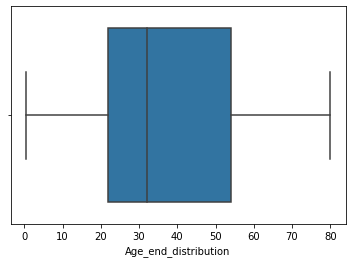

In [17]:
sns.boxplot('Age_end_distribution',data = df_titanic1)

# Here we could'nt find Outliers

# How to Handle Categorical Missing values

### 1. Frequent category Imputation

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('loan.csv',usecols = ['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [9]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [28]:
df['BsmtQual'].mode()

TA    1
dtype: int64

In [31]:
# We can use instead of using Frequent Category Imputation , we use Mode to determine highest no. of values

print(df.BsmtQual.value_counts().mode())
print(df.FireplaceQu.value_counts().mode())
print(df.GarageType.value_counts().mode())

0     35
1    121
2    618
3    649
dtype: int64
0     20
1     24
2     33
3    313
4    380
dtype: int64
0      6
1      9
2     19
3     88
4    387
5    870
dtype: int64


In [32]:
def impute_nan(df,variable):
    most_freq_val = df[variable].value_counts().index[0]
    df[variable].fillna(most_freq_val,inplace=True)

In [33]:
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df, features)

In [36]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

### 2. Adding a Variable to Capture NaN 

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('loan.csv',usecols = ['BsmtQual','FireplaceQu','GarageType'])

In [5]:
df['BsmtQual'].isnull().sum()

37

In [6]:
# To replace these NaN value to the most frequent dataset

df['BsmtQual_NaN'] = np.where(df['BsmtQual'].isnull(),1,0)
most_freq1 = df['BsmtQual'].mode()[0]
df['BsmtQual'].fillna(most_freq1,inplace = True)

In [7]:
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_NaN
0,Gd,NaN,Attchd,0
1,Gd,TA,Attchd,0
2,Gd,TA,Attchd,0
3,TA,Gd,Detchd,0
4,Gd,TA,Attchd,0


In [12]:
df['BsmtQual'].isnull().sum()

0

In [9]:
df['FireplaceQu_NaN'] = np.where(df['FireplaceQu'].isnull(),1,0)
most_freq1 = df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(most_freq1,inplace = True)
df.head()

,BsmtQual,FireplaceQu,GarageType,BsmtQual_NaN,FireplaceQu_NaN
0,Gd,Gd,Attchd,0,1
1,Gd,TA,Attchd,0,0
2,Gd,TA,Attchd,0,0
3,TA,Gd,Detchd,0,0
4,Gd,TA,Attchd,0,0


In [11]:
df['FireplaceQu'].isnull().sum()

0

#### Suppose We have more no. of frequent categories,  we just replace NaN with new category

In [21]:
df = pd.read_csv('loan.csv',usecols = ['BsmtQual','FireplaceQu','GarageType'])
df.head()

,BsmtQual,FireplaceQu,GarageType
0,Gd,NaN,Attchd
1,Gd,TA,Attchd
2,Gd,TA,Attchd
3,TA,Gd,Detchd
4,Gd,TA,Attchd


In [22]:
def impute_nan(df, variable):
    df[variable] = np.where(df[variable].isnull(),'Missing_Data',df[variable])
    
for features in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,features)
    
df.sample(20)    

,BsmtQual,FireplaceQu,GarageType
1231,TA,Missing_Data,Attchd
619,Gd,Gd,Attchd
995,TA,Missing_Data,Detchd
868,Missing_Data,TA,Attchd
1191,Gd,Missing_Data,Detchd
1146,Gd,TA,Attchd
989,Gd,Missing_Data,Attchd
412,Ex,Gd,Attchd
965,Gd,Gd,Attchd
759,Gd,TA,Attchd


## Ordinal Encoding Technique/ Label Encoding technique

In [4]:
import pandas as pd
import datetime
today_date = datetime.datetime.today()
today_date

datetime.datetime(2021, 2, 10, 11, 19, 1, 105373)

In [33]:
days = [today_date - datetime.timedelta(_) for _ in range(0,15)]
days

[datetime.datetime(2021, 2, 10, 11, 19, 1, 105373),
 datetime.datetime(2021, 2, 9, 11, 19, 1, 105373),
 datetime.datetime(2021, 2, 8, 11, 19, 1, 105373),
 datetime.datetime(2021, 2, 7, 11, 19, 1, 105373),
 datetime.datetime(2021, 2, 6, 11, 19, 1, 105373),
 datetime.datetime(2021, 2, 5, 11, 19, 1, 105373),
 datetime.datetime(2021, 2, 4, 11, 19, 1, 105373),
 datetime.datetime(2021, 2, 3, 11, 19, 1, 105373),
 datetime.datetime(2021, 2, 2, 11, 19, 1, 105373),
 datetime.datetime(2021, 2, 1, 11, 19, 1, 105373),
 datetime.datetime(2021, 1, 31, 11, 19, 1, 105373),
 datetime.datetime(2021, 1, 30, 11, 19, 1, 105373),
 datetime.datetime(2021, 1, 29, 11, 19, 1, 105373),
 datetime.datetime(2021, 1, 28, 11, 19, 1, 105373),
 datetime.datetime(2021, 1, 27, 11, 19, 1, 105373)]

In [34]:
data = pd.DataFrame(days)
data.columns = ['Day']
data['weekday']=data['Day'].dt.day_name()
# data['weekday']=data['Day'].dt.weekday_name
data.sample(5)

,Day,weekday
9,2021-02-01 11:19:01.105373,Monday
12,2021-01-29 11:19:01.105373,Friday
11,2021-01-30 11:19:01.105373,Saturday
3,2021-02-07 11:19:01.105373,Sunday
13,2021-01-28 11:19:01.105373,Thursday


In [35]:
dictionary = {'Monday': 1,'Tuesday':2,'Wednesday':3,'Thusday':4,'Friday':5,'Saturday':6,'Sunday':7
             }

In [39]:
data['Weekday_Ordinal'] = data['weekday'].map(dictionary)
data.head()

,Day,weekday,Weekday_Ordinal
0,2021-02-10 11:19:01.105373,Wednesday,3.0
1,2021-02-09 11:19:01.105373,Tuesday,2.0
2,2021-02-08 11:19:01.105373,Monday,1.0
3,2021-02-07 11:19:01.105373,Sunday,7.0
4,2021-02-06 11:19:01.105373,Saturday,6.0


## Count And Frequency Encoding 

In [55]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
columns = [1,3,5,7,8,9,13]
df = df[columns]

In [57]:
df.head()

,1,3,5,7,8,9,13
0,State-gov,Bachelors,Never-married,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Wife,Black,Female,Cuba


In [58]:
df.columns = ['Emploment', 'Degree', 'Martial_Status', 'Family_Status','Race','Sex','Country']
df.head()

,Emploment,Degree,Martial_Status,Family_Status,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Wife,Black,Female,Cuba


In [59]:
for feature in df.columns[:] :
    print(feature,':',len(df[feature].unique()),'Labels')

Emploment : 9 Labels
Degree : 16 Labels
Martial_Status : 7 Labels
Family_Status : 6 Labels
Race : 5 Labels
Sex : 2 Labels
Country : 42 Labels


In [60]:
Country_map = df['Country'].value_counts().to_dict()

In [61]:
df['Country'] = df['Country'].map(Country_map)
df.head(15)

,Emploment,Degree,Martial_Status,Family_Status,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Not-in-family,White,Male,29170
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,White,Male,29170
2,Private,HS-grad,Divorced,Not-in-family,White,Male,29170
3,Private,11th,Married-civ-spouse,Husband,Black,Male,29170
4,Private,Bachelors,Married-civ-spouse,Wife,Black,Female,95
5,Private,Masters,Married-civ-spouse,Wife,White,Female,29170
6,Private,9th,Married-spouse-absent,Not-in-family,Black,Female,81
7,Self-emp-not-inc,HS-grad,Married-civ-spouse,Husband,White,Male,29170
8,Private,Masters,Never-married,Not-in-family,White,Female,29170
9,Private,Bachelors,Married-civ-spouse,Husband,White,Male,29170


## Target Guided Ordinal Encoding

In [83]:
df = pd.read_csv('titanic.csv',usecols = ['Cabin', 'Survived'])
df.head(10)

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN
5,0,NaN
6,0,E46
7,0,NaN
8,1,NaN
9,1,NaN


In [84]:
df['Cabin'].fillna('Missing',inplace = True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [85]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [86]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [97]:
Ordinal_label = df.groupby(['Cabin'])['Survived'].mean().sort_values().index
Ordinal_label

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [98]:
Ordinal_label2 = {k:i for i, k in enumerate(Ordinal_label)}
Ordinal_label2

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [99]:
df['Cabin_Label'] = df['Cabin'].map(Ordinal_label2)
df.head()

,Survived,Cabin,Cabin_Label
0,0,M,1
1,1,C,4
2,1,M,1
3,1,C,4
4,0,M,1


## Probability Ratio Encoding

In [5]:
import pandas as pd
df = pd.read_csv('titanic.csv',usecols = ['Cabin','Survived'])
df['Cabin'].fillna('Missing', inplace = True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [6]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [11]:
prob_label = df.groupby(['Cabin'])['Survived'].mean()
prob_label=pd.DataFrame(prob_label)
prob_label

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [14]:
prob_label['Died'] = 1 - prob_label['Survived']
prob_label.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [15]:
prob_label['Prob_Ratio'] = prob_label['Survived']/prob_label['Died']
prob_label.head()

,Survived,Died,Prob_Ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [16]:
prob_encode = prob_label['Prob_Ratio'].to_dict()
prob_encode

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [24]:
df['Cabin_Encoded'] = df['Cabin'].map(prob_encode)
df.drop(["Died"] ,axis=1,inplace = True) 
df.head()

,Survived,Cabin,Cabin_Encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
